# Projeto 2 - Equalização de histograma
Esse notebook tem o objetivo de explorar a técnica de processamento de imagens para equalização de histogramas
- Notebook desenvolvido por: Marcos Vinícius Silva - 202204912
---

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Leitura inicial das imagens

In [ ]:
img1= cv2.imread('/content/Fig0316(1)(top_left).tif',cv2.IMREAD_GRAYSCALE)
img2= cv2.imread('/content/Fig0316(2)(2nd_from_top).tif',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/content/Fig0316(3)(third_from_top).tif', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('/content/Fig0316(4)(bottom_left).tif', cv2.IMREAD_GRAYSCALE)



# Código para cálculo de histograma

In [ ]:
def calcular_histograma(imagem):
    """Calcula o histograma de uma imagem."""
    histograma = np.zeros(256, dtype=int)
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            nivel_pixel = imagem[i, j]
            histograma[nivel_pixel] += 1
    return histograma

# Aplicação da função de histograma

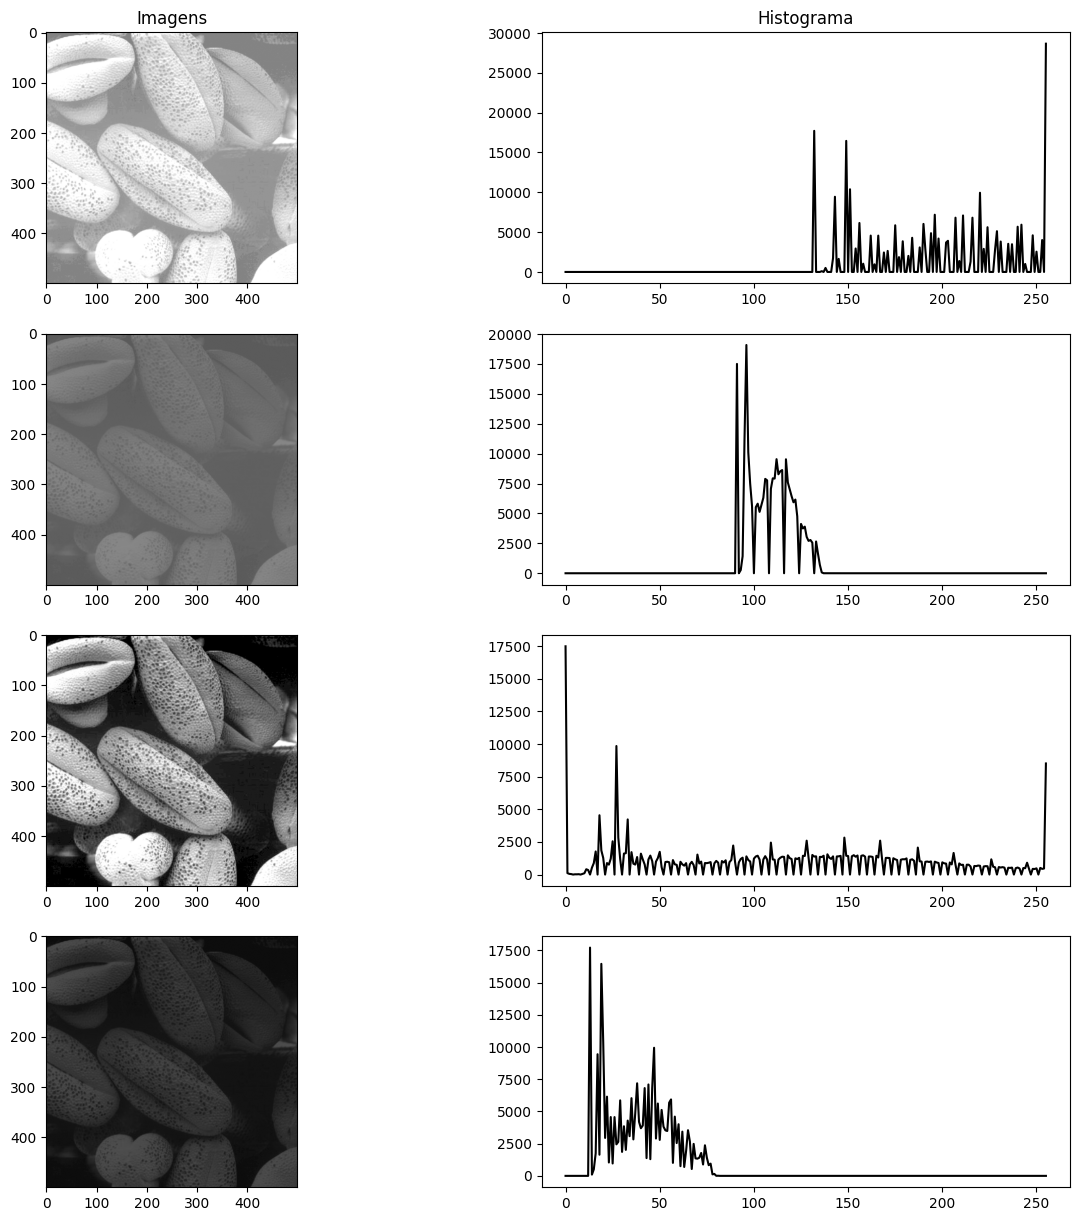

In [ ]:
h1 = calcular_histograma(img1)
h2 = calcular_histograma(img2)
h3 = calcular_histograma(img3)
h4 = calcular_histograma(img4)

f, ax = plt.subplots(4, 2, figsize=(15,15))

ax[0][0].set_title('Imagens')
ax[0][1].set_title('Histograma')

ax[0][0].imshow(img1, vmin=0, vmax=255, cmap='gray')
ax[0][1].plot(h1, color='k')

ax[1][0].imshow(img2, vmin=0, vmax=255, cmap='gray')
ax[1][1].plot(h2, color='k')

ax[2][0].imshow(img3, vmin=0, vmax=255, cmap='gray')
ax[2][1].plot(h3, color='k')

ax[3][0].imshow(img4, vmin=0, vmax=255, cmap='gray')
ax[3][1].plot(h4, color='k')


# Equalização
Equalizar um histograma é uma técnica de processamento de imagem usada para melhorar o contraste de uma imagem.

Ela faz isso redistribuindo os níveis de intensidade (valores dos pixels), de forma que o histograma da imagem (ou seja, a quantidade de pixels em cada tom de cinza) fique mais uniforme.
- Melhora o contraste da imagem
- Faz com que todos os tons de cinza sejam usados de maneira mais equilibrada

##  A fórmula utilizada da Equalização de Histograma

$$
\text{CDF}(i) = \sum_{j=0}^{i} h(j)
$$
<br>
$$
\text{CDF}_{\text{normalizada}}(i) = \left( \frac{\text{CDF}(i) - \text{CDF}_{\min}}{N - \text{CDF}_{\min}} \right) \times 255
$$

- CDF: Função de distribuição acumulada, representa a quantidade de pixels até o nível i
- N: Numero total de pixel da imagem
<br>
A equalização de histograma pega a distribuição original de tons e a estica de modo proporcial a quantidade acumulada de pixels de cada valor

In [ ]:
def equalizar_histograma(imagem):
    """Realiza a equalização de histograma em uma imagem."""
    histograma = calcular_histograma(imagem)
    cdf = histograma.cumsum()
    cdf_min = cdf.min()
    N = imagem.size
    cdf_normalizada = ((cdf - cdf_min) / (N - cdf_min)) * 255
    cdf_normalizada = cdf_normalizada.astype(np.uint8)
    img_equalizada = cdf_normalizada[imagem]
    return img_equalizada

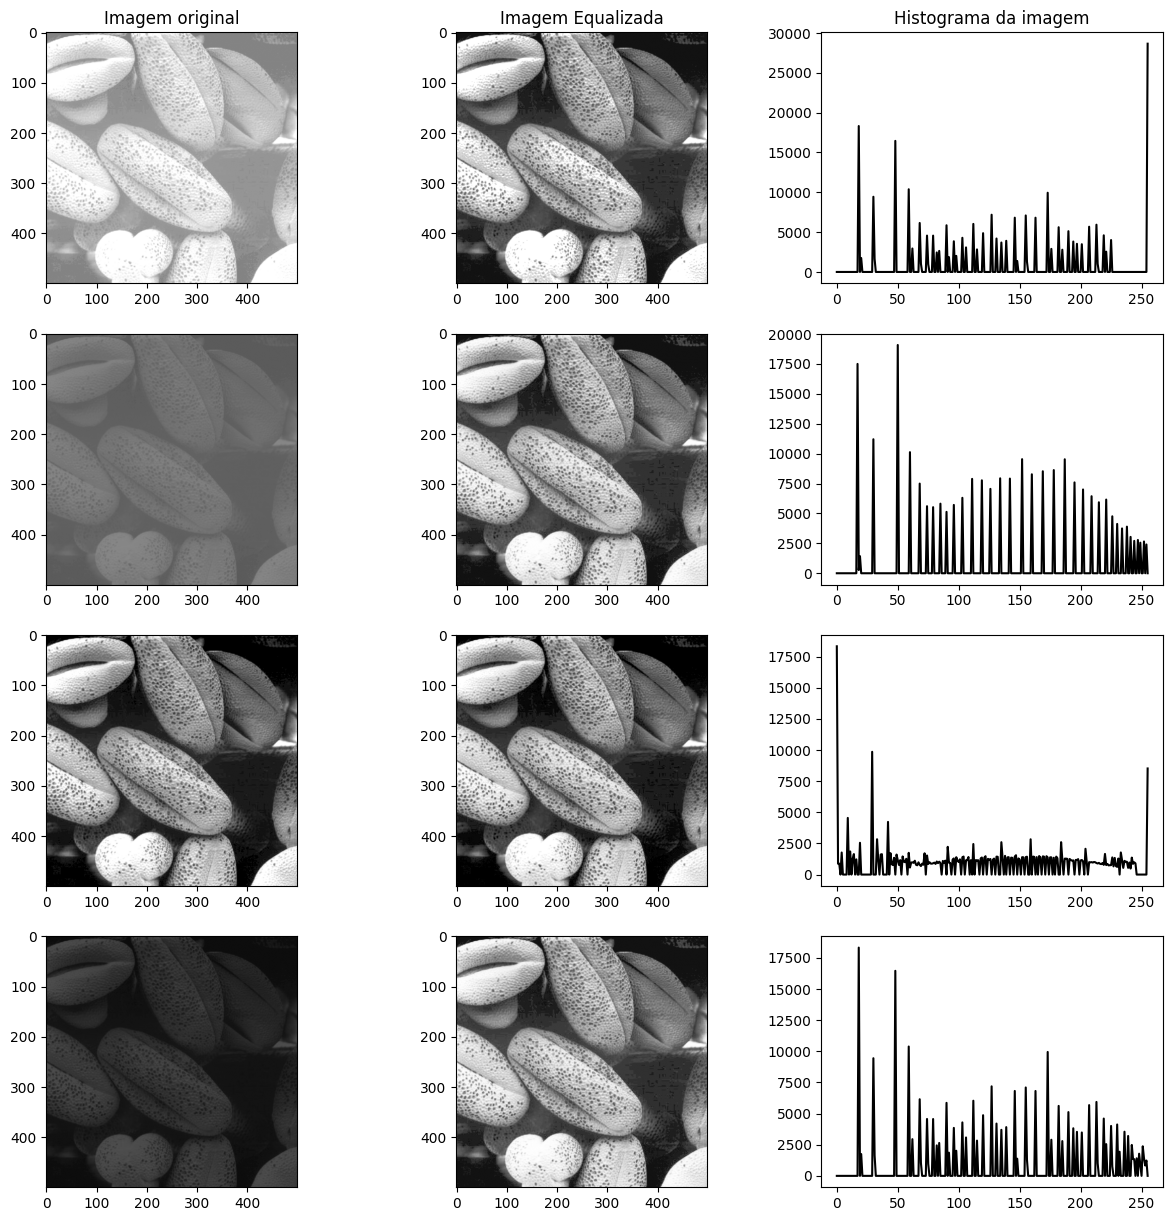

In [ ]:
img1_eq = equalizar_histograma(img1)
img2_eq = equalizar_histograma(img2)
img3_eq = equalizar_histograma(img3)
img4_eq = equalizar_histograma(img4)

h1_eq = calcular_histograma(img1_eq)
h2_eq = calcular_histograma(img2_eq)
h3_eq = calcular_histograma(img3_eq)
h4_eq = calcular_histograma(img4_eq)

f, ax = plt.subplots(4, 3, figsize=(15,15))

ax[0][0].set_title('Imagem original')
ax[0][0].imshow(img1, vmin=0, vmax=255, cmap='gray')
ax[0][1].set_title('Imagem Equalizada')
ax[0][1].imshow(img1_eq, vmin=0, vmax=255, cmap='gray')
ax[0][2].set_title('Histograma da imagem')
ax[0][2].plot(h1_eq, color='k')


ax[1][0].imshow(img2, vmin=0, vmax=255, cmap='gray')
ax[1][1].imshow(img2_eq, vmin=0, vmax=255, cmap='gray')
ax[1][2].plot(h2_eq, color='k')


ax[2][0].imshow(img3, vmin=0, vmax=255, cmap='gray')
ax[2][1].imshow(img3_eq, vmin=0, vmax=255, cmap='gray')
ax[2][2].plot(h3_eq, color='k')


ax[3][0].imshow(img4, vmin=0, vmax=255, cmap='gray')
ax[3][1].imshow(img4_eq, vmin=0, vmax=255, cmap='gray')
ax[3][2].plot(h4_eq, color='k')


# Conclusão
A técnica de equalização de imagens mostrou-se eficiente para melhorar a qualidade visual em imagens com pouca distribuição de intensidade, promovendo uma melhor distinção entre regiões claras e escuras. Logo:
- Realça detalhes ocultos em regiões sub ou superexpostas.
- Distribui melhor os níveis de cinza, tornando o histograma mais uniforme.

## Entretanto
- Não é adequada para todas as imagens — em casos com contraste já adequado, pode prejudicar a qualidade final.